In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

## xx201

In [12]:
df=pd.read_csv('./bootstrap_error/6050390201/best_fit_period_samir_sir_suggestion.txt',sep='\t',header=None)
# df1=pd.read_csv('./bootstrap_error/6050390201/best_fit_period_100.1.txt',sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    object 
 1   1       200 non-null    float64
 2   2       200 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [348]:
# plt.figure(figsize=(12,6))
# plt.plot(df[1],'-o',label=f'gaussian= {df[1].mean()}$\pm${df[1].std()}')
# #plt.plot(df1['Best_Fit_Period'],'-o',label=r'uniform= 9.80596$\pm$0.00913')
# plt.grid()
# plt.title('Gaussian vs Uniform 100 iterations pre outbursst xx201')
# plt.ylabel('Period (sec)')
# plt.xlabel('Iteration No.')
# plt.legend()

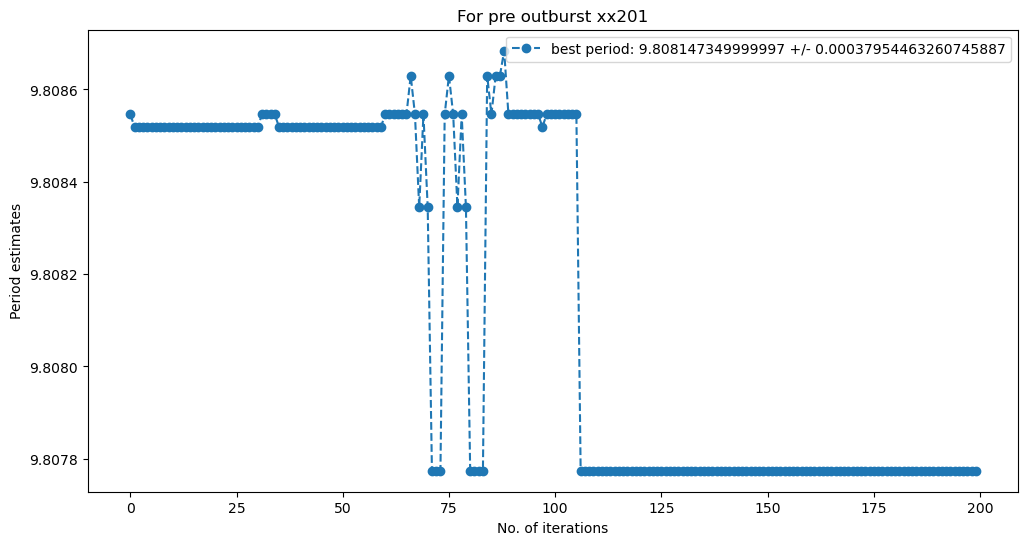

In [13]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(df[1])),df[1],'--o',label=f'best period: {df[1].mean()} +/- {df[1].std()}')
plt.title('For pre outburst xx201')
plt.xlabel('No. of iterations')
plt.ylabel('Period estimates')
plt.legend()

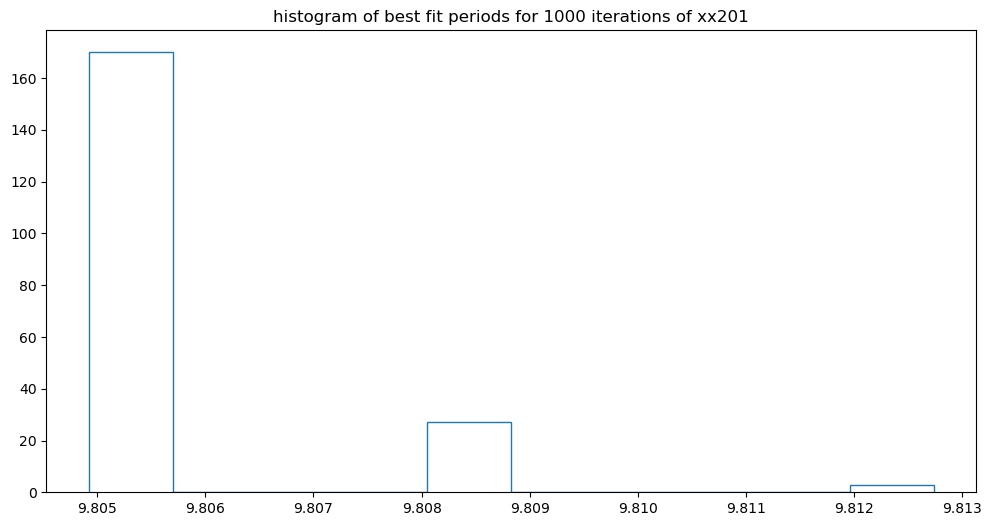

(array([170.,   0.,   0.,   0.,  27.,   0.,   0.,   0.,   0.,   3.]),
 array([9.80492 , 9.805702, 9.806484, 9.807266, 9.808048, 9.80883 ,
        9.809612, 9.810394, 9.811176, 9.811958, 9.81274 ]))

In [15]:
plt.figure(figsize=(12,6))
freq =plt.hist(df[1],histtype='step')
plt.title('histogram of best fit periods for 1000 iterations of xx201')
plt.show()
freq[0],freq[1]

#plt.hist(df1['Best_Fit_Period'],histtype='step')

In [21]:
# ### Checking chisq vs period files

# with fits.open('testing_efsearch.fes') as hdul:
#     per=hdul['RESULTS'].data['PERIOD']
#     chisq=hdul['RESULTS'].data['CHISQRD1']

# plt.plot(per,chisq)
# plt.axvline(per[np.argmax(chisq)])
# print(per[np.argmax(chisq)],chisq[np.argmax(chisq)])

### Reading sample fits files

In [20]:
# with fits.open('./6050390201/xti/event_cl/ni6050390201_cl_night_barycorrmpu7_sr_night_0.01.lc') as hdul:
#         rate_data = hdul['RATE'].data
#         time = rate_data['TIME']
#         rate2 = rate_data['RATE']
#         error2 = rate_data['ERROR']

# with fits.open('./bootstrap_error/6050390201/synthetic_light_curve_20.fits') as hdul:
#         rate_data = hdul['RATE'].data
#         time20 = rate_data['TIME']
#         rate20 = rate_data['RATE']
#         error20 = rate_data['ERROR']

# with fits.open('./bootstrap_error/6050390201/synthetic_light_curve_21.fits') as hdul:
#         rate_data = hdul['RATE'].data
#         time21 = rate_data['TIME']
#         rate21 = rate_data['RATE']
#         error21 = rate_data['ERROR']

# with fits.open('./bootstrap_error/6050390201/synthetic_light_curve_22.fits') as hdul:
#         rate_data = hdul['RATE'].data
#         time22 = rate_data['TIME']
#         rate22 = rate_data['RATE']
#         error22 = rate_data['ERROR']    

In [19]:
# ### Generating a random light curve manually
# gamma = np.random.uniform(-1, 1, size=len(rate2))
# synthetic_rate=rate2+gamma*error2
# synthetic_rate2 = np.zeros_like(rate2)  # Initialize array for synthetic rate
# for j in range(len(rate2)):
#     gamma_j = np.random.uniform(-1, 1)  # Generate a new random number for each bin
#     synthetic_rate2[j] = rate2[j]+gamma_j*error2[j] 

In [18]:
# plt.hist(rate2[rate2>0],bins=50)
# plt.hist(error2[rate2>0],bins=50)
# plt.title('histogram of count rate and error')
# plt.show()

In [17]:
# #plt.hist(rate2,bins=50, label='original lc p=9.816')
# #plt.hist(rate20,bins=50,label='sythetic lc17 p=9.7972')
# #plt.hist(rate21,bins=50,label='sythetic lc18 p=9.8069')
# plt.hist(rate22,bins=50,label='synthetic lc19 p=9.8069')
# #plt.hist(synthetic_rate,bins=50,label='generated now')
# #plt.hist(synthetic_rate2,bins=50,label='generated now bin by bin')
# plt.title('histogram of counts original vs synthetics')
# plt.legend(loc='upper right')
# plt.show()

In [16]:
# plt.scatter(time,rate2,0.5,label='original lc')
# #plt.scatter(time,rate17,0.5,label='synthetic lc 17')
# plt.scatter(time,synthetic_rate,0.5,label='original lc')
# # plt.scatter(time,synthetic_rate2,0.5,label='original lc')
# plt.legend(loc='upper right')

In [23]:
# plt.scatter(time, rate17-rate18,0.1,label='curve 17 - curve 18')
# plt.scatter(time, rate18-rate19,0.1,label='curve 18 - curve 19')
# plt.title('difference betweeen individual values between synthetic light curve')
# plt.legend(loc='upper right')

NameError: name 'time' is not defined

In [22]:
# plt.scatter(time, rate2-rate17,0.1,label='curve 17')
# plt.scatter(time, rate2-rate18,0.1,label='curve 18')
# plt.scatter(time, rate2-rate19,0.1,label='curve 19')
# plt.title('difference betweeen individual values with original lc')
# plt.legend(loc='upper right')

NameError: name 'time' is not defined

In [165]:
# from scipy.stats import pearsonr,spearmanr
# ## Check spearman coefficient
# # Check correlation between each synthetic light curve and the one just before it
# correlation_results = []
# spearman_correlations = []


# corr_coeff, _ = pearsonr(rate17, rate18)
# spearman_corr, _ = spearmanr(rate17, rate18)
# correlation_results.append(corr_coeff)
# spearman_correlations.append(spearman_corr)
# corr_coeff, _ = pearsonr(rate18, rate19)
# spearman_corr, _ = spearmanr(rate18, rate19)
# correlation_results.append(corr_coeff)
# spearman_correlations.append(spearman_corr)
# corr_coeff, _ = pearsonr(rate17, rate19)
# spearman_corr, _ = spearmanr(rate17, rate19)
# correlation_results.append(corr_coeff)
# spearman_correlations.append(spearman_corr)
# #print(f"Correlation between Curve {i} and Curve {i-1}: {corr_coeff:.4f}")
# print('done')

done


In [166]:
# spearman_correlations,correlation_results

([0.8645128311547158, 0.8688400408674869, 0.8177570816673555],
 [0.9759104180601018, 0.976845310011856, 0.9530517943722749])

In [210]:
# best_fit=[]
# efsearch17=fits.open('./bootstrap_error/6050390201/efsearch17.fes')
# perios17=efsearch17[1].data['PERIOD']
# chisq17=efsearch17[1].data['CHISQRD1']
# best_fit.append(perios17[np.argmax(chisq17)])

# efsearch18=fits.open('./bootstrap_error/6050390201/efsearch18.fes')
# perios18=efsearch18[1].data['PERIOD']
# chisq18=efsearch18[1].data['CHISQRD1']
# best_fit.append(perios18[np.argmax(chisq18)])

# efsearch19=fits.open('./bootstrap_error/6050390201/efsearch19.fes')
# perios19=efsearch19[1].data['PERIOD']
# chisq19=efsearch19[1].data['CHISQRD1']
# best_fit.append(perios19[np.argmax(chisq19)])

# efsearch20=fits.open('./bootstrap_error/6050390201/efsearch20.fes')
# perios20=efsearch20[1].data['PERIOD']
# chisq20=efsearch20[1].data['CHISQRD1']
# best_fit.append(perios20[np.argmax(chisq20)])

[9.7972, 9.7972, 9.804200000000002, 9.804200000000002]


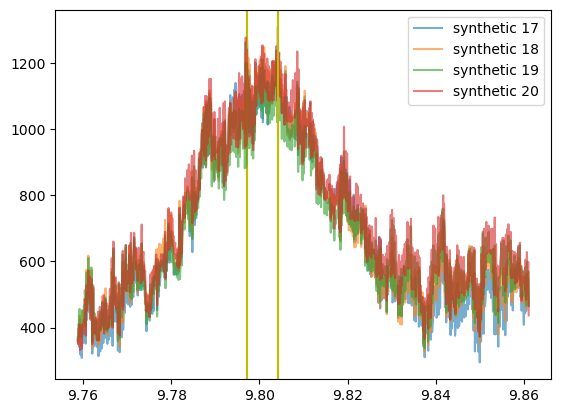

In [211]:
# print(best_fit)
# plt.plot(perios17,chisq17,label='synthetic 17',alpha=0.6)
# plt.axvline(best_fit[0],c='y')
# plt.plot(perios18,chisq18,label='synthetic 18',alpha=0.6)
# plt.axvline(best_fit[1],c='y')
# plt.plot(perios19,chisq19,label='synthetic 19',alpha=0.6)
# plt.axvline(best_fit[2],c='y')
# plt.plot(perios20,chisq20,label='synthetic 20',alpha=0.6)
# plt.axvline(best_fit[3],c='y')
# plt.legend(loc='upper right')

## xx204

In [342]:
df=pd.read_csv('./bootstrap_error/6050390204/best_fit_period_0.01bin_40.txt',sep='\t',header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40 non-null     object 
 1   1       40 non-null     float64
 2   2       40 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


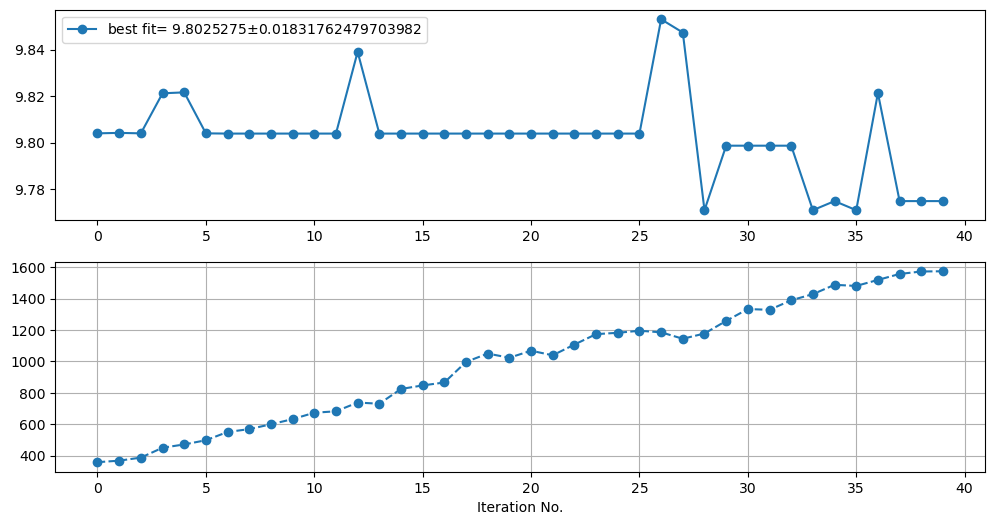

In [343]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
axs[0].plot(df[1],'-o',label=f'best fit= {df[1].mean()}$\pm${df[1].std()}')
axs[1].plot(df[2],'--o')
#plt.plot(df3['Best_Fit_Period'],'-o',label=r'uniform= 9.80575$\pm$0.00780')
plt.xlabel('Iteration No.')
axs[0].legend()
plt.grid()

(array([ 7.,  0.,  0.,  4., 23.,  0.,  3.,  0.,  1.,  2.]),
 array([9.771 , 9.7792, 9.7874, 9.7956, 9.8038, 9.812 , 9.8202, 9.8284,
        9.8366, 9.8448, 9.853 ]),
 <BarContainer object of 10 artists>)

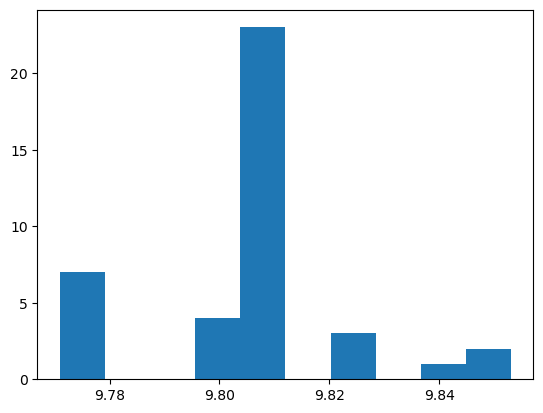

In [344]:
plt.hist(df[1])

In [24]:
# ## Reading and plotting og lc
# with fits.open('./6050390204/xti/event_cl/ni6050390204_cl_night_barycorrmpu7_sr_night_0.01.lc') as hdul:
#         rate_data = hdul['RATE'].data
#         time = rate_data['TIME']
#         rate2 = rate_data['RATE']
#         error2 = rate_data['ERROR']

# plt.hist(rate2,bins=50)
# plt.hist(error2,bins=50)
# plt.show()

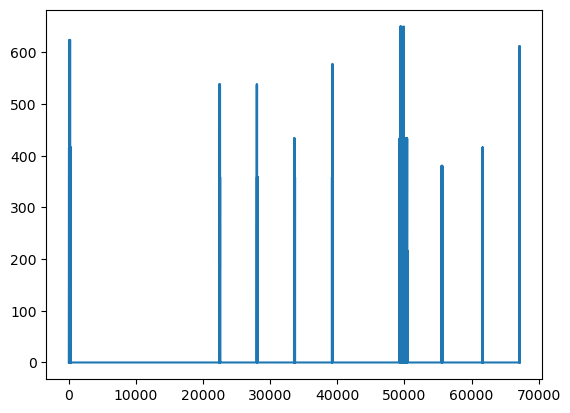

In [317]:
plt.plot(time,rate2)

## xx227

In [252]:
df=pd.read_csv('./bootstrap_error/6050390227/best_fit_period_0.01bin_40.txt',sep='\t',header=None)
# df1=pd.read_csv('./bootstrap_error/6050390201/best_fit_period_100.1.txt',sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40 non-null     object 
 1   1       40 non-null     float64
 2   2       40 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


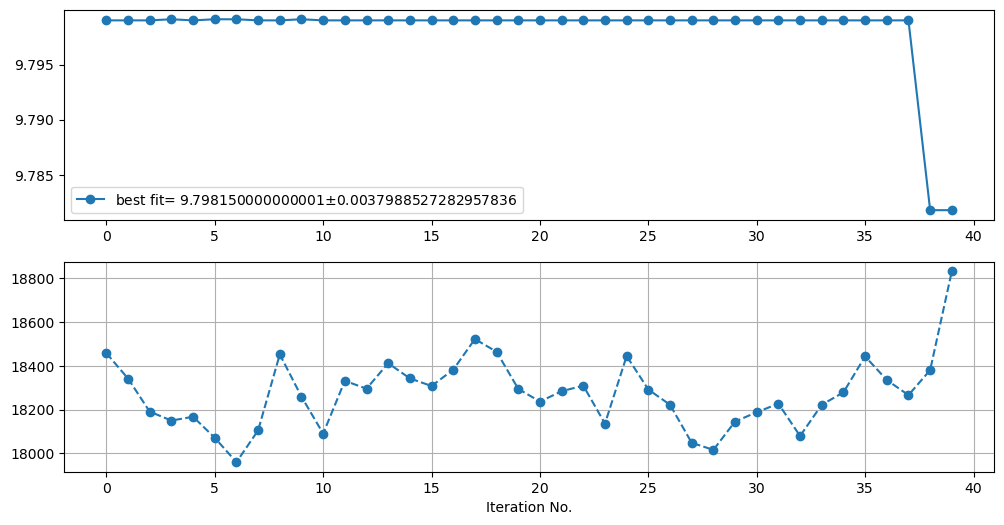

In [253]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
axs[0].plot(df[1],'-o',label=f'best fit= {df[1].mean()}$\pm${df[1].std()}')
axs[1].plot(df[2],'--o')
#plt.plot(df3['Best_Fit_Period'],'-o',label=r'uniform= 9.80575$\pm$0.00780')
plt.xlabel('Iteration No.')
axs[0].legend()
plt.grid()

9.799000000000001 18443.55


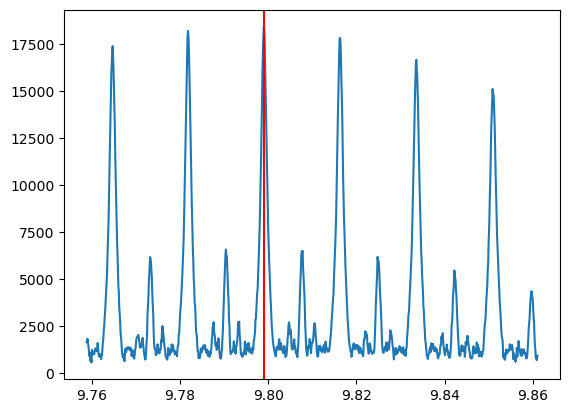

In [251]:
### Checking chisq vs period files

with fits.open('./bootstrap_error/6050390227/testing_efsearch.fes') as hdul:
    per=hdul['RESULTS'].data['PERIOD']
    chisq=hdul['RESULTS'].data['CHISQRD1']

plt.plot(per,chisq)
plt.axvline(per[np.argmax(chisq)],c='r')
print(per[np.argmax(chisq)],chisq[np.argmax(chisq)])

# Using random of fcalc

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df201=pd.read_csv('./bootstrap_error/6050390201/periods1.dat',header=None,sep=' ')
df204=pd.read_csv('./bootstrap_error/6050390204/periods.dat',header=None,sep=' ')
df227=pd.read_csv('./bootstrap_error/6050390227/periods.dat',header=None,sep=' ')
df244=pd.read_csv('./bootstrap_error/6050390244/periods.dat',header=None,sep=' ')
df261=pd.read_csv('./bootstrap_error/6050390261/periods.dat',header=None,sep='\t')
df284=pd.read_csv('./bootstrap_error/6050390284/periods.dat',header=None,sep=' ')
df201.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


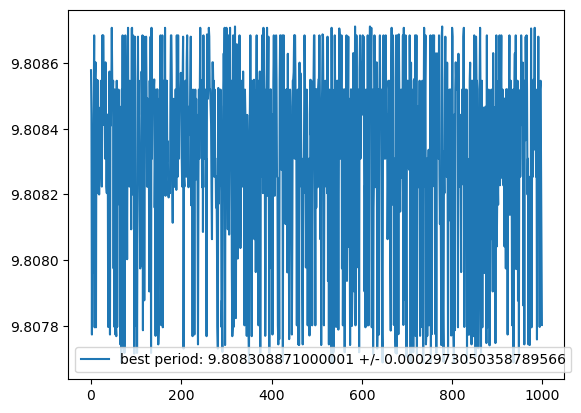

In [9]:

plt.plot(df201[0],label=f'best period: {df201[0].mean()} +/- {np.std(df201[0])}')
plt.legend()

In [12]:
def report_period(dfllist):
    for df in dflist:
        print("best found period is: {:.6f} +/- {:.8f}".format(df[0].mean(),np.std(df[0])))

dflist=[df201,df204,df227,df244,df261,df284]
report_period(dflist)

best found period is: 9.808309 +/- 0.00029731
best found period is: 9.803960 +/- 0.00003946
best found period is: 9.799059 +/- 0.00000611
best found period is: 9.809524 +/- 0.00001440
best found period is: 9.788999 +/- 0.00000257
best found period is: 9.774942 +/- 0.00004657


In [7]:
def plot_dist(df,bins):
    plt.figure(figsize=(12,5))
    plt.hist(df[0],bins=bins)
    plt.title("Distribution of period estimates")
    plt.show()

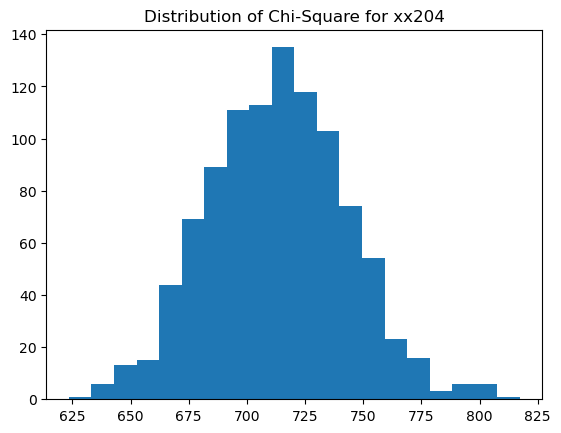

Text(0.5, 1.0, 'Distribution of Period for xx204')

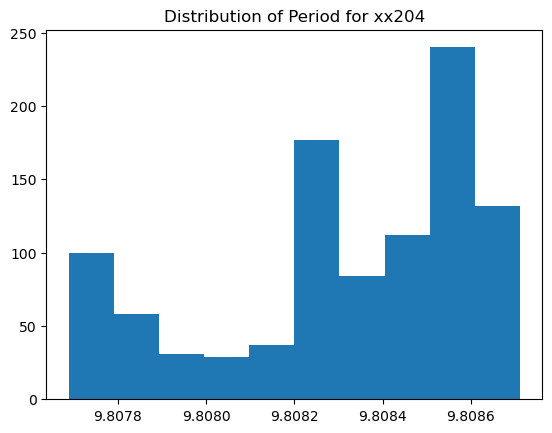

In [15]:
plt.hist(df201[1],20)
plt.title('Distribution of Chi-Square for xx204')
plt.show()
plt.hist(df201[0],10)
plt.title('Distribution of Period for xx204')

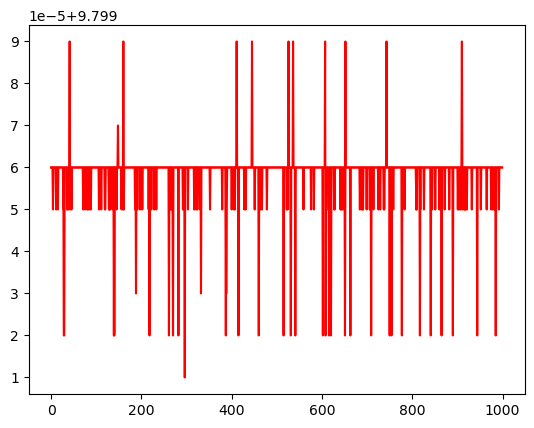

In [138]:
plt.plot(df227[0],'r')
plt.plot(df227a[0],'r')

(array([ 16.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  49.,   0.,   0.,   0.,   0., 929.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.]),
 array([9.79902   , 9.79902233, 9.79902467, 9.799027  , 9.79902933,
        9.79903167, 9.799034  , 9.79903633, 9.79903867, 9.799041  ,
        9.79904333, 9.79904567, 9.799048  , 9.79905033, 9.79905267,
        9.799055  , 9.79905733, 9.79905967, 9.799062  , 9.79906433,
        9.79906667, 9.799069  , 9.79907133, 9.79907367, 9.799076  ,
        9.79907833, 9.79908067, 9.799083  , 9.79908533, 9.79908767,
        9.79909   ]),
 [<matplotlib.patches.Polygon at 0x7f9b636d6ad0>])

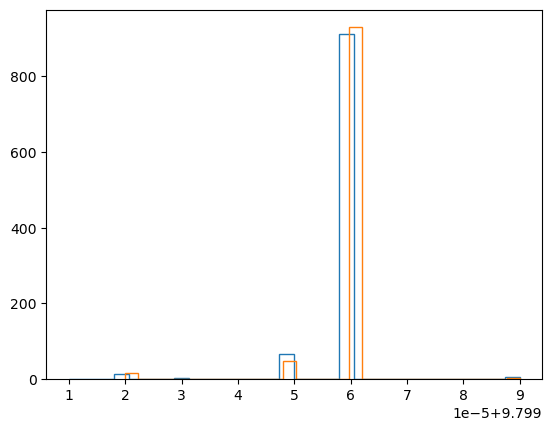

In [139]:
df227=pd.read_csv('./bootstrap_error/6050390227/periods.dat',header=None,sep=' ')
df227a=pd.read_csv('./bootstrap_error/6050390227/periods1.dat',header=None,sep=' ')
array=np.random.normal(df227[0].mean(),df227[0].std(),1000)
#plt.hist(array,histtype='step')
plt.hist(df227[0],bins=30,histtype='step')
plt.hist(df227a[0],bins=30,histtype='step')

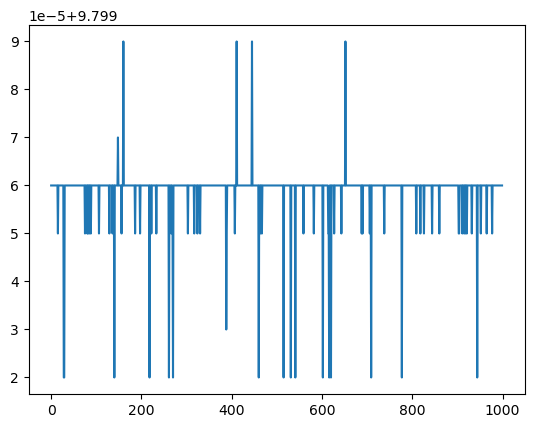

In [44]:
plt.plot(df227[0])

9.788998756000002 2.57224882132889e-06


(array([1.000e+00, 6.000e+00, 3.000e+01, 0.000e+00, 4.600e+01, 1.890e+02,
        2.000e+00, 0.000e+00, 0.000e+00, 3.700e+01, 6.000e+00, 0.000e+00,
        4.900e+01, 1.097e+03, 2.100e+01, 0.000e+00, 5.000e+00, 0.000e+00,
        1.000e+01, 1.000e+00]),
 array([9.78899   , 9.78899075, 9.7889915 , 9.78899225, 9.788993  ,
        9.78899375, 9.7889945 , 9.78899525, 9.788996  , 9.78899675,
        9.7889975 , 9.78899825, 9.788999  , 9.78899975, 9.7890005 ,
        9.78900125, 9.789002  , 9.78900275, 9.7890035 , 9.78900425,
        9.789005  ]),
 <BarContainer object of 20 artists>)

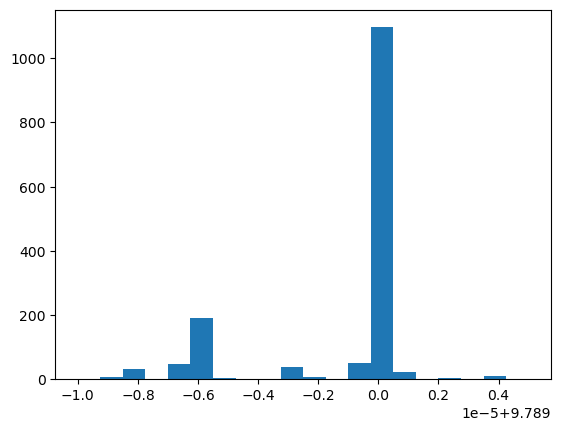

In [106]:
#df261=pd.read_csv('./bootstrap_error/6050390261/periods1.dat',header=None,sep='\t')
df261a=pd.read_csv('./bootstrap_error/6050390261/periods.dat',header=None,sep='\t')
#array=np.random.normal(df227[0].mean(),df227[0].std(),1000)

print(df261a[0].mean(),np.std(df261a[0]))
plt.hist(df261a[0],bins=20)

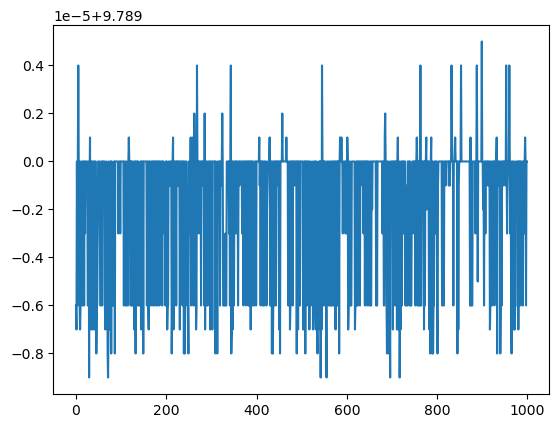

In [102]:
plt.plot(df261a[0])